# Compra en linea

Importacion de librerias

In [73]:
# Importacion de librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from math import sqrt
from sklearn.metrics import accuracy_score

In [74]:
# importacion de datos
df=pd.read_csv('./compra_en_linea.csv', sep=';')
df.head()



,User ID,Género,Edad,Salario,Compro
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [75]:
df.info()
df.describe()
df.drop(columns=['Género', 'User ID'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User ID  400 non-null    int64 
 1   Género   400 non-null    object
 2   Edad     400 non-null    int64 
 3   Salario  400 non-null    int64 
 4   Compro   400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [76]:
df.corr().T


,Edad,Salario,Compro
Edad,1.000000,0.155238,0.622454
Salario,0.155238,1.000000,0.362083
Compro,0.622454,0.362083,1.000000


In [77]:
df["Compro"].value_counts().rename({0:'No compra',1:'Compra'})

Compro
No compra    257
Compra       143
Name: count, dtype: int64

In [78]:
df.mean()


Edad          37.6550
Salario    69742.5000
Compro         0.3575
dtype: float64

In [79]:
cols_con_ceros = ['Edad', 'Salario']
for col in cols_con_ceros:
    df[col] = df[col].replace(0,np.nan)
    mean = int(df[col].mean(skipna=True))
    df[col] = df[col].replace(np.nan,mean)

In [80]:
df

,Edad,Salario,Compro
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [81]:
df.mean()

Edad          37.6550
Salario    69742.5000
Compro         0.3575
dtype: float64

In [82]:
x=df.drop('Compro', axis=1)
y=df['Compro']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [83]:
sc_X = StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test= sc_X.transform(x_test)

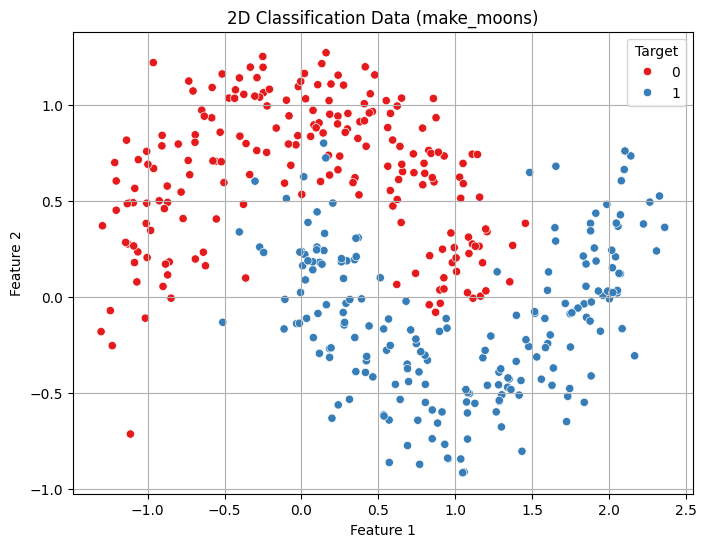

In [88]:
from sklearn.datasets import make_moons
import seaborn as sns

# Generar datos 2D tipo "moons"
x, y = make_moons(n_samples=400, noise=0.2, random_state=42)

# Crear DataFrame para graficar
df = pd.DataFrame(x, columns=["Feature 1", "Feature 2"])
df["Target"] = y  # Longitudes coinciden (400)

# Visualización
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Feature 1", y="Feature 2", hue="Target", palette="Set1")
plt.title("2D Classification Data (make_moons)")
plt.grid(True)
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=21,p=2,metric='euclidean')
knn_model.fit(x_train, y_train)
n=21
for i in range(1,n+1):
    print(["Scores com k=",i," : ",accuracy_score(y_test, knn_model.predict(x_test))])

['Scores com k=', 1, ' : ', 0.925]
['Scores com k=', 2, ' : ', 0.925]
['Scores com k=', 3, ' : ', 0.925]
['Scores com k=', 4, ' : ', 0.925]
['Scores com k=', 5, ' : ', 0.925]
['Scores com k=', 6, ' : ', 0.925]
['Scores com k=', 7, ' : ', 0.925]
['Scores com k=', 8, ' : ', 0.925]
['Scores com k=', 9, ' : ', 0.925]
['Scores com k=', 10, ' : ', 0.925]
['Scores com k=', 11, ' : ', 0.925]
['Scores com k=', 12, ' : ', 0.925]
['Scores com k=', 13, ' : ', 0.925]
['Scores com k=', 14, ' : ', 0.925]
['Scores com k=', 15, ' : ', 0.925]
['Scores com k=', 16, ' : ', 0.925]
['Scores com k=', 17, ' : ', 0.925]
['Scores com k=', 18, ' : ', 0.925]
['Scores com k=', 19, ' : ', 0.925]
['Scores com k=', 20, ' : ', 0.925]
['Scores com k=', 21, ' : ', 0.925]


In [ ]:
knn_model.score(x_test, y_test)

0.925

In [ ]:
print('F1_score: ',f1_score(y_test, pipe.predict(x_test)))

F1_score:  0.8813559322033898
